# Examining Political Donations

In [36]:
from arcgis.gis import GIS
from IPython.display import display
import pandas as pd

In [37]:
gis = GIS(profile='agol_profile')

### Access and Geocode Address Data

In [38]:
voter_file = gis.content.get("57894e2fb17b47b08c2608887a8e4897")
csv_file = voter_file.download(save_path=r"c:\temp", file_name="address.csv" )
df = pd.read_csv(csv_file, encoding="ISO-8859-1")
df.head()

,First_Name,Last_Name,Gender,Address,Address2,City,State,ZIP,Volunteer,Donate
0,Guillermo,Abaye,M,5924 Sandy Rdg,NaN,Elkridge,MD,21075,yes,2700
1,Jack,Abel,F,8931 Footed Rdg,NaN,Columbia,MD,21045,no,0
2,Mary,Abel,M,11516 Jamestown Ct,NaN,Laurel,MD,20723,no,0
3,Brandon,Aboozar,M,7308 Carved Stone,NaN,Columbia,MD,21045,yes,0
4,Jeffrey,Abraham,F,8214 Arbor Meadows Ln,NaN,Columbia,MD,21045,no,0


In [39]:
geocoded_fc = gis.content.import_data(df=df)
geocoded_fc

<FeatureCollection>

In [40]:
gc_map = gis.map("Maryland")
gc_map.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'xmin': -8586268.28378512,
                 'ymin': 4733599.9383514235,
                 'xmax': -8511665.744178887,
                 'ymax': 4764174.749665453}
gc_map

MapView(layout=Layout(height='400px', width='100%'))

In [42]:
gc_map.add_layer(geocoded_fc)

### Access Census Data

<Item title:"Maryland Census Boundaries - Census Tracts 2010" type:Feature Layer Collection owner:mdimapdatacatalog>
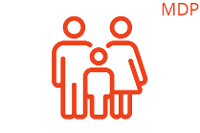

In [43]:
item = gis.content.get("2cb6e7dfc87047ccaa38f59d955d907b")
item

In [44]:
sdf = item.layers[0].query("CNTY2010 = '24027'", as_df=True)
sdf.head()

,ACRES,ALAND10,AWATER10,CNTY2010,CT10,CT2010,FID_tl_201,GEODESC,OBJECTID_1,SHAPE,SQ_MILES,Shape.area,Shape.len
0,330.91229,1339252,0,24027,601107,24027601107,1401,6011.07,1390,"{""rings"": [[[-8547060.298, 4748310.109200001],...",0.51705,2.232476e+06,6919.738067
1,358.84060,1424289,27995,24027,606705,24027606705,1371,6067.05,1360,"{""rings"": [[[-8554677.6681, 4747778.3015], [-8...",0.56069,2.420282e+06,6981.891419
2,520.80881,2076511,31277,24027,606604,24027606604,1365,6066.04,1354,"{""rings"": [[[-8552089.4899, 4751690.6087], [-8...",0.81376,3.514854e+06,9087.698410
3,513.14616,2061074,37271,24027,606607,24027606607,1384,6066.07,1373,"{""rings"": [[[-8550283.8878, 4753644.385499999]...",0.80179,3.464832e+06,9558.110476
4,735.18331,2858229,117171,24027,606704,24027606704,1376,6067.04,1365,"{""rings"": [[[-8552312.2403, 4749062.988899998]...",1.14872,4.960021e+06,9783.846005


In [45]:
sdf.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

### Summarize Locations within Polygons

In [46]:
from arcgis.features.summarize_data import summarize_within

In [47]:
result = summarize_within(sum_within_layer=sdf.spatial.to_feature_collection(), output_name="SummaryWithinOutput5",
                          summary_layer=geocoded_fc, sum_shape=True, summary_fields=["Donate SUM"])

In [48]:
result

<Item title:"SummaryWithinOutput5" type:Feature Layer Collection owner:AndrewSolutions>

In [49]:
m4 = gis.map()
m4.extent = result.extent
m4.basemap = 'dark-gray'
m4

MapView(layout=Layout(height='400px', width='100%'))

In [51]:
m4.add_layer(result)

### Enrich Data to Locate More Information

- use `enrich` to load the Age data

In [20]:
from arcgis.geoenrichment import *

In [21]:
usa = Country.get('United States')
df = usa.data_collections
df.loc['Age']['analysisVariable'].unique()

array(['Age.MALE0', 'Age.MALE5', 'Age.MALE10', 'Age.MALE15', 'Age.MALE20',
       'Age.MALE25', 'Age.MALE30', 'Age.MALE35', 'Age.MALE40',
       'Age.MALE45', 'Age.MALE50', 'Age.MALE55', 'Age.MALE60',
       'Age.MALE65', 'Age.MALE70', 'Age.MALE75', 'Age.MALE80',
       'Age.MALE85', 'Age.FEM0', 'Age.FEM5', 'Age.FEM10', 'Age.FEM15',
       'Age.FEM20', 'Age.FEM25', 'Age.FEM30', 'Age.FEM35', 'Age.FEM40',
       'Age.FEM45', 'Age.FEM50', 'Age.FEM55', 'Age.FEM60', 'Age.FEM65',
       'Age.FEM70', 'Age.FEM75', 'Age.FEM80', 'Age.FEM85'], dtype=object)

In [52]:
count_sdf = result.layers[0].query(as_df=True)
count_sdf.head()

,ACRES,ALAND10,AWATER10,AnalysisArea,CNTY2010,CT10,CT2010,FID_tl_201,GEODESC,OBJECTID,OBJECTID_1,Point_Count,SHAPE,SQ_MILES,SUM_Donate
0,330.91229,1339252,0,1.339254,24027,601107,24027601107,1401,6011.07,1,1390,0,"{""rings"": [[[-8547060.298, 4748310.1092], [-85...",0.51705,NaN
1,358.84060,1424289,27995,1.452285,24027,606705,24027606705,1371,6067.05,2,1360,24,"{""rings"": [[[-8554677.6681, 4747778.3015], [-8...",0.56069,9925.0
2,520.80881,2076511,31277,2.107790,24027,606604,24027606604,1365,6066.04,3,1354,49,"{""rings"": [[[-8552089.4899, 4751690.6087], [-8...",0.81376,15425.0
3,513.14616,2061074,37271,2.076770,24027,606607,24027606607,1384,6066.07,4,1373,14,"{""rings"": [[[-8550283.8878, 4753644.3855], [-8...",0.80179,75.0
4,735.18331,2858229,117171,2.975403,24027,606704,24027606704,1376,6067.04,5,1365,71,"{""rings"": [[[-8552312.2403, 4749062.9889], [-8...",1.14872,26680.0


In [53]:
enrich_sdf = enrich(study_areas=count_sdf, data_collections=['Age'])
enrich_sdf.head()

,ACRES,ALAND10,AWATER10,AnalysisArea,CNTY2010,CT10,CT2010,FEM0,FEM10,FEM15,...,OBJECTID_0,OBJECTID_1,Point_Count,SHAPE,SQ_MILES,SUM_Donate,aggregationMethod,apportionmentConfidence,populationToPolygonSizeRating,sourceCountry
0,330.91229,1339252,0,1.339254,24027,601107,24027601107,153,144,113,...,1,1390,0,"{""rings"": [[[-76.77954899984552, 39.1857249991...",0.51705,NaN,BlockApportionment:US.BlockGroups,2.576,2.191,US
1,358.84060,1424289,27995,1.452285,24027,606705,24027606705,57,64,56,...,2,1360,24,"{""rings"": [[[-76.84797699970176, 39.1820219994...",0.56069,9925,BlockApportionment:US.BlockGroups,2.576,2.191,US
2,520.80881,2076511,31277,2.107790,24027,606604,24027606604,128,146,96,...,3,1354,49,"{""rings"": [[[-76.82472699935091, 39.2092589994...",0.81376,15425,BlockApportionment:US.BlockGroups,2.576,2.191,US
3,513.14616,2061074,37271,2.076770,24027,606607,24027606607,128,155,140,...,4,1373,14,"{""rings"": [[[-76.80850699971623, 39.2228569992...",0.80179,75,BlockApportionment:US.BlockGroups,2.576,2.191,US
4,735.18331,2858229,117171,2.975403,24027,606704,24027606704,255,279,211,...,5,1365,71,"{""rings"": [[[-76.82672800023956, 39.1909669989...",1.14872,26680,BlockApportionment:US.BlockGroups,2.576,2.191,US


### Find the Dollar Raised Per Person

#### Summarize the Total Population

In [54]:
cols = [col for col in enrich_sdf.columns if (col.find("FEM") > -1 or col.find("MALE") > -1)]
enrich_sdf['TOTAL_POP'] = enrich_sdf[cols].sum(axis=1)

#### Clean up the Data

In [55]:
enrich_sdf["SUM_Donate"] = (enrich_sdf["SUM_Donate"]
                            .replace('NaN', 0)
                            .astype(int))

#### Calculate Donation Dollars Per Person

In [56]:
enrich_sdf["DOLLARPERPERSON"] = enrich_sdf['SUM_Donate'] / enrich_sdf['TOTAL_POP']
q = enrich_sdf["DOLLARPERPERSON"] > 0
target_tracts = enrich_sdf[q].copy().reset_index(drop=True)

In [57]:
m3 = gis.map("Maryland")
m3.basemap = 'dark-gray'
m3

MapView(layout=Layout(height='400px', width='100%'))

In [58]:
m3.extent = target_tracts.spatial.full_extent
target_tracts.spatial.plot(map_widget=m3,
                           renderer_type='c',  # for class breaks renderer
                           method='esriClassifyNaturalBreaks',  # classification algorithm
                           class_count=10,  # choose the number of classes
                           col='DOLLARPERPERSON',  # numeric column to classify
                           cmap='prism_r',  # color map to pick colors from for each class
                           alpha=0.4)

True

### Generate Age Profile from Donations

- Use matplotlib to display data in a visual way

#### Define the Pyramid

In [41]:
def age_pyramid(df):
    import warnings
    import seaborn as sns
    import matplotlib.pyplot as plt

    %matplotlib inline
    warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None 
    plt.style.use('ggplot')

    df = df[[x for x in df.columns if 'MALE' in x or 'FEM' in x]]
    sf = pd.DataFrame(df.sum())
    age = sf.index.str.extract('(\d+)').astype('int64')
    f = sf[sf.index.str.startswith('FEM')]
    m = sf[sf.index.str.startswith('MALE')]
    sf = sf.reset_index(drop = True)
    f = f.reset_index(drop = True)
    m = m.reset_index(drop = True)
    sf['age'] = age
    f["age"] = age
    m["age"] = age
    f = f.sort_values(by='age', ascending=False).set_index('age')
    m = m.sort_values(by='age', ascending=False).set_index('age')
    

    popdf = pd.concat([f, m], axis=1)
    popdf.columns = ['F', 'M']
    popdf['agelabel'] = popdf.index.map(str) + ' - ' + (popdf.index+4).map(str)
    popdf.M = -popdf.M
    
    sns.barplot(x="F", y="agelabel", color="#CC6699", label="Female", data=popdf, edgecolor='none')
    sns.barplot(x="M",  y="agelabel", color="#008AB8", label="Male",   data=popdf,  edgecolor='none')
    plt.ylabel('Age group')
    plt.xlabel('Number of people');
    return plt;

#### Generate the Age Pyramid for All Donations

<module 'matplotlib.pyplot' from 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-dev\\lib\\site-packages\\matplotlib\\pyplot.py'>

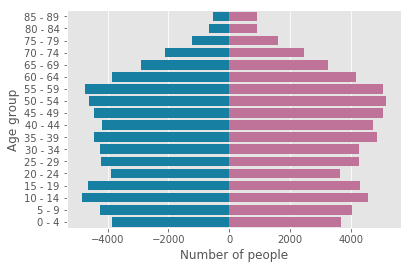

In [43]:
age_pyramid(target_tracts)

#### Generate the Age Pyramid for Top Grossing Areas

- The age population skews younger than the donation as a whole

<module 'matplotlib.pyplot' from 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-dev\\lib\\site-packages\\matplotlib\\pyplot.py'>

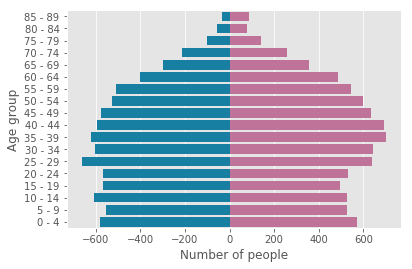

In [44]:
age_pyramid(target_tracts[target_tracts.DOLLARPERPERSON > 4].copy())